# CLASSIFICATION

**Data Description**: The dataset 'incident_event_log.csv' This is an event log of an incident management process extracted from data gathered from the audit system of an instance of the ServiceNowTM platform used by an IT company. For example,  incident identifiers, states, timelines, involved personnel, impact, and final outcomes. This dataset contains both categorical and numerical data, demonstrates view of the incident lifecycle.

**Domain**: Focusing on Incident management.  It has to deal with tunplanned interruptions or reductions in quality of IT services.

**Attribute Information**
* 1. **`number`**: incident identifier (24,918 different values)
* 2. **`incident state`**: eight levels controlling the incident management process transitions from opening until closing the case;
* 3.  **`active`**: boolean attribute that shows whether the record is active or closed/canceled;
* 4.  **`reassignment_count`**: number of times the incident has the group or the support analysts changed;
* 5.  **`reopen_count`**: number of times the incident resolution was rejected by the caller;
* 6.  **`sys_mod_count`**: number of incident updates until that moment;
* 7.  **`made_sla`**: boolean attribute that shows whether the incident exceeded the target SLA;
* 8.  **`caller_id`**: identifier of the user affected;
* 9.  **`opened_by`**: identifier of the user who reported the incident;
* 10. **`opened_at`**: incident user opening date and time;
* 11. **`sys_created_by`**: identifier of the user who registered the incident;
* 12. **`sys_created_at`**: incident system creation date and time;
* 13. **`sys_updated_by`**: identifier of the user who updated the incident and generated the current log record;
* 14. **`sys_updated_at`**: incident system update date and time;
* 15. **`contact_type`**: categorical attribute that shows by what means the incident was reported;
* 16. **`location`**: identifier of the location of the place affected;
* 17. **`category`**: first-level description of the affected service;
* 18. **`subcategory`**: second-level description of the affected service (related to the first level description, i.e., to category);
* 19. **`u_symptom`**: description of the user perception about service availability;
* 20. **`cmdb_ci`**: (confirmation item) identifier used to report the affected item (not mandatory);
* 21. **`impact`**: description of the impact caused by the incident (values: 1â€“High; 2â€“Medium; 3â€“Low);
* 22. **`urgency`**: description of the urgency informed by the user for the incident resolution (values: 1â€“High; 2â€“Medium; 3â€“Low);
* 23. **`priority`**: calculated by the system based on 'impact' and 'urgency';
* 24. **`assignment_group`**: identifier of the support group in charge of the incident;
* 25. **`assigned_to`**: identifier of the user in charge of the incident;
* 26. **`knowledge`**: boolean attribute that shows whether a knowledge base document was used to resolve the incident;
* 27. **`u_priority_confirmation`**: boolean attribute that shows whether the priority field has been double-checked;
* 28. **`notify`**: categorical attribute that shows whether notifications were generated for the incident;
* 29. **`problem_id`**: identifier of the problem associated with the incident;
* 30. **`rfc`**: (request for change) identifier of the change request associated with the incident;
* 31. **`vendor`**: identifier of the vendor in charge of the incident;
* 32. **`caused_by`**: identifier of the RFC responsible by the incident;
* 33. **`close_code`**: identifier of the resolution of the incident;
* 34. **`resolved_by`**: identifier of the user who resolved the incident;
* 35. **`resolved_at`**: incident user resolution date and time (dependent variable);
* 36. **`closed_at`**: incident user close date and time (dependent variable).

**Learning Outcomes**
* Exploratory Data Analysis (EDA)
* Feature Engineering and Selection
* Classification Modeling
* Clustering Analysis
* Model Comparison and Evaluation
* Innovative Modeling Techniques

### INSTALLING NECCESSARY PACKAGES FOR THIS PROJECT

In [1]:
!pip install -U imbalanced-learn

# Importing packages - Pandas, Numpy, Seaborn, Scipy
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, sys
import matplotlib.style as style; style.use('fivethirtyeight')
from scipy.stats import zscore, norm

np.random.seed(0)

# Modelling - LR, KNN, NB, Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingClassifier

# SelectKBest importing
from sklearn.feature_selection import SelectKBest, f_classif

# Import necessary libraries for regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE

# Oversampling
from imblearn.over_sampling import SMOTE

# Seaborn 
import seaborn as sns

# Cluster Modelling 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Innovative Model
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')
pd.options.display.max_rows = 4000

## Task 1: Retrieving and Preparing the Data

In [2]:
# Data Retrieval
# Load the dataset
incident_data = pd.read_csv('incident_event_log.csv')
incident_data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


#### Observation 0 - Checking the data shape
Checking the data shape of the 'incident_data' dataset

In [3]:
# Preliminary Data Exploration
# Checking the shape of the dataset
print("Dataset shape:", incident_data)

Dataset shape:             number incident_state  active  reassignment_count  reopen_count   
0       INC0000045            New    True                   0             0  \
1       INC0000045       Resolved    True                   0             0   
2       INC0000045       Resolved    True                   0             0   
3       INC0000045         Closed   False                   0             0   
4       INC0000047            New    True                   0             0   
...            ...            ...     ...                 ...           ...   
141707  INC0120835         Closed   False                   1             0   
141708  INC0121064         Active    True                   0             0   
141709  INC0121064         Active    True                   1             0   
141710  INC0121064       Resolved    True                   1             0   
141711  INC0121064         Closed   False                   1             0   

        sys_mod_count  made_sla    c

#### Observation 0 - Overview of a dataset

In [4]:
# Getting an overview of the dataset
print(incident_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

#### Observation 1 - Checking for missing values, including '?' and replacing them
Checking for missing values represented as '?' and replacing them

In [5]:
# Replace all missing values with 'unknown information' across the dataset
incident_data.fillna('unknown information', inplace=True)

In [6]:
# Replace '?' with 'unknown information' for missing values
incident_data.replace({'?': 'unknown information'}, inplace=True)

In [7]:
# Replace 'unknown information' and '?' with NaN for further processing
incident_data.replace({'unknown information': np.nan, '?': np.nan}, inplace=True)

In [8]:
# Display data types and missing values before handling
print("Data types before handling missing values:\n", incident_data.dtypes)

Data types before handling missing values:
 number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
cmdb_ci                    object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
prob

In [9]:
# Handling Missing Values
# Checking for missing values
missing_values = incident_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 number                          0
incident_state                  0
active                          0
reassignment_count              0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
caller_id                      29
opened_by                    4835
opened_at                       0
sys_created_by              53076
sys_created_at              53076
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
location                       76
category                       78
subcategory                   111
u_symptom                   32964
cmdb_ci                    141267
impact                          0
urgency                         0
priority                        0
assignment_group            14213
assigned_to                 27496
knowledge                       0
u_priority_confirmation         0
notify                          0
problem_id      

In [10]:
# Handling missing values
for column in incident_data.columns:
    if incident_data[column].dtype == 'object':  # Categorical columns
        mode_value = incident_data[column].mode()[0]
        incident_data[column].fillna(mode_value, inplace=True)
    else:  # Numerical columns
        mean_value = incident_data[column].mean()
        incident_data[column].fillna(mean_value, inplace=True)

In [11]:
# Verify the replacement by checking for missing values again
missing_values_after_replacement = incident_data.isna().sum()
print("Missing values after handling:")
missing_values_after_replacement

Missing values after handling:


number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
cmdb_ci                    0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
problem_id                 0
rfc                        0
vendor                     0
caused_by                  0
closed_code                0
resolved_by                0
resolved_at   

#### Observation 2 - Removing white spaces from string columns

In [12]:
# Data Cleaning
# Removing unwanted characters in string columns
# This is useful if your data contains unnecessary symbols or characters in text fields.
for column in incident_data.select_dtypes(include=['object']).columns:
    incident_data[column] = incident_data[column].str.replace('[unwanted_character]', '', regex=True)

In [13]:
# Removing white spaces from string columns
string_columns = incident_data.select_dtypes(include='object').columns
incident_data[string_columns] = incident_data[string_columns].applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [14]:
# Handling outliers
# For numerical columns, outliers can be handled in various ways. Here we'll use the IQR method.
for column in incident_data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = incident_data[column].quantile(0.25)
    Q3 = incident_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Handling outliers by capping
    incident_data[column] = np.where(incident_data[column] < lower_bound, lower_bound, incident_data[column])
    incident_data[column] = np.where(incident_data[column] > upper_bound, upper_bound, incident_data[column])

In [15]:
# Removing duplicates
# If your data contains duplicate records, you may want to remove them to prevent skewing your analysis.
incident_data.drop_duplicates(inplace=True)

#### Observation 3 - Converting date columns to datetime format

In [16]:
# Converting date columns to datetime format
datetime_columns = ['opened_at', 'sys_created_at', 'sys_updated_at', 'resolved_at', 'closed_at']
incident_data[datetime_columns] = incident_data[datetime_columns].apply(pd.to_datetime, errors='coerce')
incident_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141499 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141499 non-null  object        
 1   incident_state           141499 non-null  object        
 2   active                   141499 non-null  bool          
 3   reassignment_count       141499 non-null  float64       
 4   reopen_count             141499 non-null  float64       
 5   sys_mod_count            141499 non-null  float64       
 6   made_sla                 141499 non-null  bool          
 7   caller_id                141499 non-null  object        
 8   opened_by                141499 non-null  object        
 9   opened_at                141499 non-null  datetime64[ns]
 10  sys_created_by           141499 non-null  object        
 11  sys_created_at           141499 non-null  datetime64[ns]
 12  sys_updated_by       

#### Observation 4 - Standardizing text data

In [17]:
# Standardizing text data
text_columns = incident_data.select_dtypes(include='object').columns
incident_data[text_columns] = incident_data[text_columns].apply(lambda x: x.str.lower())

#### Observation 5 - Feature engineering for incident duration (Preparation for Task 2: Feature Engineering)

In [18]:
# Feature engineering for incident duration
incident_data['duration_hours'] = (incident_data['closed_at'] - incident_data['opened_at']).dt.total_seconds() / 3600
incident_data['duration_hours'].fillna(incident_data['duration_hours'].median(), inplace=True)
incident_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141499 entries, 0 to 141711
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141499 non-null  object        
 1   incident_state           141499 non-null  object        
 2   active                   141499 non-null  bool          
 3   reassignment_count       141499 non-null  float64       
 4   reopen_count             141499 non-null  float64       
 5   sys_mod_count            141499 non-null  float64       
 6   made_sla                 141499 non-null  bool          
 7   caller_id                141499 non-null  object        
 8   opened_by                141499 non-null  object        
 9   opened_at                141499 non-null  datetime64[ns]
 10  sys_created_by           141499 non-null  object        
 11  sys_created_at           141499 non-null  datetime64[ns]
 12  sys_updated_by       

#### Observation 6 - Conducting Exploratory Data Analysis (EDA)

In [19]:
print("Descriptive Statistics for Numerical Columns:")
print(incident_data.describe())

Descriptive Statistics for Numerical Columns:
       reassignment_count  reopen_count  sys_mod_count   
count       141499.000000      141499.0  141499.000000  \
mean             0.819582           0.0       4.193948   
min              0.000000           0.0       0.000000   
25%              0.000000           0.0       1.000000   
50%              1.000000           0.0       3.000000   
75%              1.000000           0.0       6.000000   
max              2.500000           0.0      13.500000   
std              0.936843           0.0       4.126887   

                           opened_at                 sys_created_at   
count                         141499                         141499  \
mean   2016-04-12 22:29:30.870748416  2016-05-11 05:59:09.215471872   
min              2016-02-29 01:16:00            2016-02-29 01:23:00   
25%              2016-03-16 15:27:00            2016-03-24 11:49:00   
50%              2016-04-07 16:34:00            2016-05-04 15:09:00   
75%  

#### Observation 7 - Data normalisation/standardisation

In [20]:
# Data normalization/standardization
incident_data['duration_hours'] = (incident_data['duration_hours'] - incident_data['duration_hours'].mean()) / incident_data['duration_hours'].std()
# Normalizing numerical data
scaler = StandardScaler()
numerical_columns = incident_data.select_dtypes(include=['float64', 'int64']).columns
incident_data[numerical_columns] = scaler.fit_transform(incident_data[numerical_columns])
incident_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141499 entries, 0 to 141711
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141499 non-null  object        
 1   incident_state           141499 non-null  object        
 2   active                   141499 non-null  bool          
 3   reassignment_count       141499 non-null  float64       
 4   reopen_count             141499 non-null  float64       
 5   sys_mod_count            141499 non-null  float64       
 6   made_sla                 141499 non-null  bool          
 7   caller_id                141499 non-null  object        
 8   opened_by                141499 non-null  object        
 9   opened_at                141499 non-null  datetime64[ns]
 10  sys_created_by           141499 non-null  object        
 11  sys_created_at           141499 non-null  datetime64[ns]
 12  sys_updated_by       

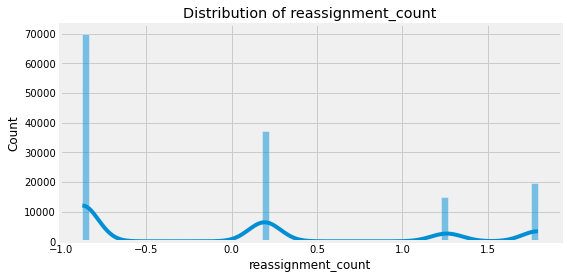

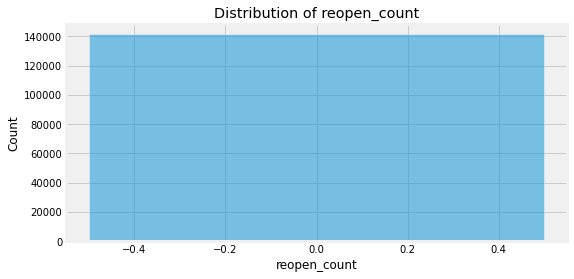

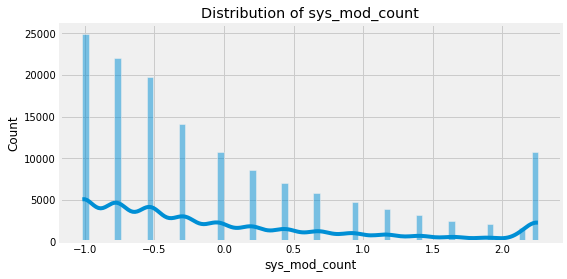

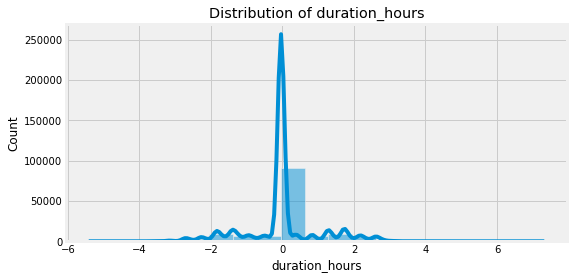

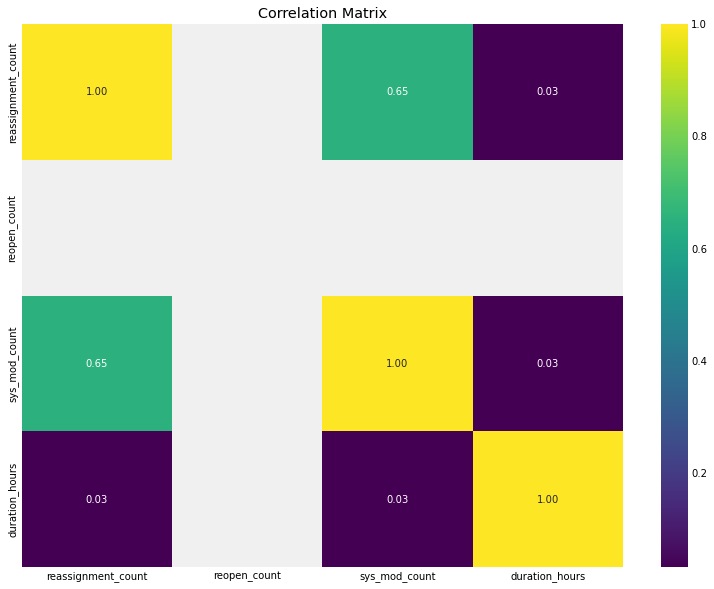

In [21]:
# Additional Step: Exploratory Data Analysis (EDA)

# Visualizing the distribution of all numerical columns
numerical_columns = incident_data.select_dtypes(include=['float64', 'int64']).columns

# Plotting histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(incident_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Correlation matrix for only numeric columns
numeric_incident_data = incident_data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_incident_data.corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [22]:
# Print the preprocessed data
print("\nPreprocessed Data:")
incident_data.head()


Preprocessed Data:


,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,duration_hours
0,inc0000045,n,True,-0.874837,0.0,-1.016253,True,cll 2403,op by 8,2016-02-29 01:16:00,...,do no noify,poblm id 14,chg0000132,o 8s,chg0000097,o 5,rsolv by 149,2016-02-29 11:29:00,2016-05-03 12:00:00,-0.076703
1,inc0000045,rsolv,True,-0.874837,0.0,-0.531625,True,cll 2403,op by 8,2016-02-29 01:16:00,...,do no noify,poblm id 14,chg0000132,o 8s,chg0000097,o 5,rsolv by 149,2016-02-29 11:29:00,2016-05-03 12:00:00,-0.076703
2,inc0000045,rsolv,True,-0.874837,0.0,-0.289311,True,cll 2403,op by 8,2016-02-29 01:16:00,...,do no noify,poblm id 14,chg0000132,o 8s,chg0000097,o 5,rsolv by 149,2016-02-29 11:29:00,2016-05-03 12:00:00,-0.076703
3,inc0000045,clos,False,-0.874837,0.0,-0.046996,True,cll 2403,op by 8,2016-02-29 01:16:00,...,do no noify,poblm id 14,chg0000132,o 8s,chg0000097,o 5,rsolv by 149,2016-02-29 11:29:00,2016-05-03 12:00:00,-0.076703
4,inc0000047,n,True,-0.874837,0.0,-1.016253,True,cll 2403,op by 397,2016-02-29 04:40:00,...,do no noify,poblm id 14,chg0000132,o 8s,chg0000097,o 5,rsolv by 81,2016-03-01 09:52:00,2016-06-03 10:00:00,0.386847


## Task 2: Feature Engineering 

In [23]:
# Feature Engineering: Creating new features and encoding categorical variables
# 1. Interaction Terms - capture combined effects of features
incident_data['interaction_reopen_sysmod'] = incident_data['reopen_count'] * incident_data['sys_mod_count']

In [24]:
# 2. Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = incident_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    incident_data[col] = label_encoder.fit_transform(incident_data[col].astype(str))

In [ ]:
print("   - Affected columns: {}".format(", ".join(categorical_columns)) + ".\n")

In [25]:
# 3. Convert datetime columns to a numerical format (Unix timestamp)
datetime_columns = ['opened_at', 'sys_created_at', 'sys_updated_at', 'resolved_at', 'closed_at']
for col in datetime_columns:
    incident_data[col] = pd.to_datetime(incident_data[col], errors='coerce')
    incident_data[col] = incident_data[col].astype(np.int64) // 10**9

In [61]:
print("   - Columns converted: {}".format(", ".join(datetime_columns)) + ".\n")

   - Columns converted: opened_at, sys_created_at, sys_updated_at, resolved_at, closed_at.



In [26]:
# 4. Normalizing numerical data
scaler = StandardScaler()
numerical_columns = incident_data.select_dtypes(include=['float64', 'int64']).columns
incident_data[numerical_columns] = scaler.fit_transform(incident_data[numerical_columns])

In [27]:
# Feature Selection: Using ANOVA F-test to select important features

# Assuming 'active' is the target variable
y = incident_data['active']
X = incident_data.drop('active', axis=1)

In [28]:
# Selecting top 10 features based on ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

In [63]:
# Displaying selected features after applying SelectKBest
selected_features = X.columns[selector.get_support()]
print("\nTop 10 Selected Features:\n", selected_features)


Top 10 Selected Features:
 Index(['number', 'reassignment_count', 'sys_mod_count', 'made_sla',
       'sys_created_by', 'sys_created_at', 'sys_updated_by', 'sys_updated_at',
       'knowledge', 'u_priority_confirmation'],
      dtype='object')


In [64]:
# Displaying the first few rows of the dataset after feature engineering
print("\n### Dataset Preview After Feature Engineering ###")
print(incident_data.head())


### Dataset Preview After Feature Engineering ###
     number  incident_state  active  reassignment_count  reopen_count   
0 -1.592221        0.654702    True           -0.874837           0.0  \
1 -1.592221        1.318990    True           -0.874837           0.0   
2 -1.592221        1.318990    True           -0.874837           0.0   
3 -1.592221       -0.009586   False           -0.874837           0.0   
4 -1.592085        0.654702    True           -0.874837           0.0   

   sys_mod_count  made_sla  caller_id  opened_by  opened_at  ...  problem_id   
0      -1.016253      True  -0.784031   1.793611  -1.178193  ...   -0.096963  \
1      -0.531625      True  -0.784031   1.793611  -1.178193  ...   -0.096963   
2      -0.289311      True  -0.784031   1.793611  -1.178193  ...   -0.096963   
3      -0.046996      True  -0.784031   1.793611  -1.178193  ...   -0.096963   
4      -1.016253      True  -0.784031   0.557333  -1.174390  ...   -0.096963   

        rfc    vendor  caused

## Task 3: Data Modelling 

### Classification Models

In [29]:
# Assuming incident_data is your DataFrame and 'target_column' is your target
X = incident_data.drop('active', axis=1)
y = incident_data['active']

In [30]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model 1: Logistic Regression with Hyperparameter Tuning

In [32]:
# Define a logistic regression model with hyperparameter tuning
log_reg_params = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

log_reg = LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, verbose=True, n_jobs=-1)
log_reg_grid.fit(X_train_scaled, y_train)

# Evaluate the tuned model
best_log_reg = log_reg_grid.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test_scaled)
print("Best Logistic Regression Parameters:", log_reg_grid.best_params_)
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Logistic Regression Parameters: {'C': 0.00026366508987303583, 'penalty': 'l1', 'solver': 'liblinear'}

Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.87      0.90      5040
        True       0.97      0.98      0.98     23260

    accuracy                           0.97     28300
   macro avg       0.95      0.93      0.94     28300
weighted avg       0.96      0.97      0.96     28300



### Model 2: Random Forest with Feature Importance

In [33]:
# Define and train a Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Feature importance analysis
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("\nRandom Forest Feature Importances:\n", feature_importances)


Random Forest Feature Importances:
                            importance
sys_updated_by               0.299682
incident_state               0.285215
u_priority_confirmation      0.125694
made_sla                     0.111825
sys_mod_count                0.072695
sys_updated_at               0.031367
resolved_at                  0.016947
assigned_to                  0.009393
sys_created_at               0.006828
reassignment_count           0.006721
assignment_group             0.006168
opened_at                    0.005356
number                       0.004898
resolved_by                  0.003804
closed_at                    0.001865
sys_created_by               0.001572
duration_hours               0.001539
knowledge                    0.001179
opened_by                    0.001177
urgency                      0.000875
category                     0.000866
priority                     0.000788
closed_code                  0.000654
impact                       0.000589
caller_id    

In [34]:
# Evaluate Random Forest model
y_pred_rf = rf_classifier.predict(X_test_scaled)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      5040
        True       1.00      1.00      1.00     23260

    accuracy                           1.00     28300
   macro avg       1.00      1.00      1.00     28300
weighted avg       1.00      1.00      1.00     28300



### Clustering Models

### Model 3: Gradient Boosting Classifier

In [35]:
# Define and train a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train_scaled, y_train)

# Evaluate Gradient Boosting Classifier
y_pred_gb = gb_classifier.predict(X_test_scaled)
print("\nGradient Boosting Classifier Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Classifier Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      5040
        True       1.00      1.00      1.00     23260

    accuracy                           1.00     28300
   macro avg       1.00      1.00      1.00     28300
weighted avg       1.00      1.00      1.00     28300



#### Explanation for K-Means Clustering Model

The K-Means clustering result indicates that the dataset has been divided into three distinct clusters based on similarities in their features. Cluster 1, the largest group, contains 120,130 incidents, suggesting common patterns among the majority of incidents. Cluster 0, with 19,268 incidents, and Cluster 2, the smallest with 2,314 incidents, represent smaller, more distinct groupings. These clusters reveal the underlying structure of the incident data, highlighting groups of incidents with shared characteristics, which could be crucial for targeted analysis or resource allocation.

###  K-Means with Silhouette Analysis


In [36]:
# Use a smaller range for the number of clusters or use a sample of the data
range_n_clusters = list(range(2, 6))  # Smaller range
sample_size = 1000  # Adjust sample size as needed
X_train_sampled = X_train_scaled[:sample_size]

silhouette_scores = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X_train_sampled)
    silhouette_avg = silhouette_score(X_train_sampled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.8066241108865806
For n_clusters = 3 The average silhouette_score is : 0.10378523647260275
For n_clusters = 4 The average silhouette_score is : 0.10454297477621366
For n_clusters = 5 The average silhouette_score is : 0.09556265178246713


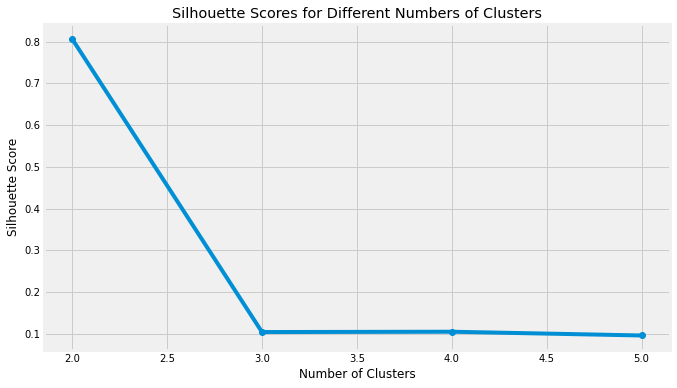

In [37]:
# Plot silhouette scores
plt.figure(figsize=(10,6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [38]:
# Choose the optimal number of clusters (e.g., 4) and apply K-Means
optimal_clusters = 4  # Modify based on your observation from silhouette scores
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans_optimal.fit_predict(X_train_scaled)

In [39]:
# Add cluster labels to the dataset for further analysis
X_train_clustered = X_train.copy()
X_train_clustered['Cluster'] = cluster_labels

### Analyzing the Clusters Formed in X_train_clustered

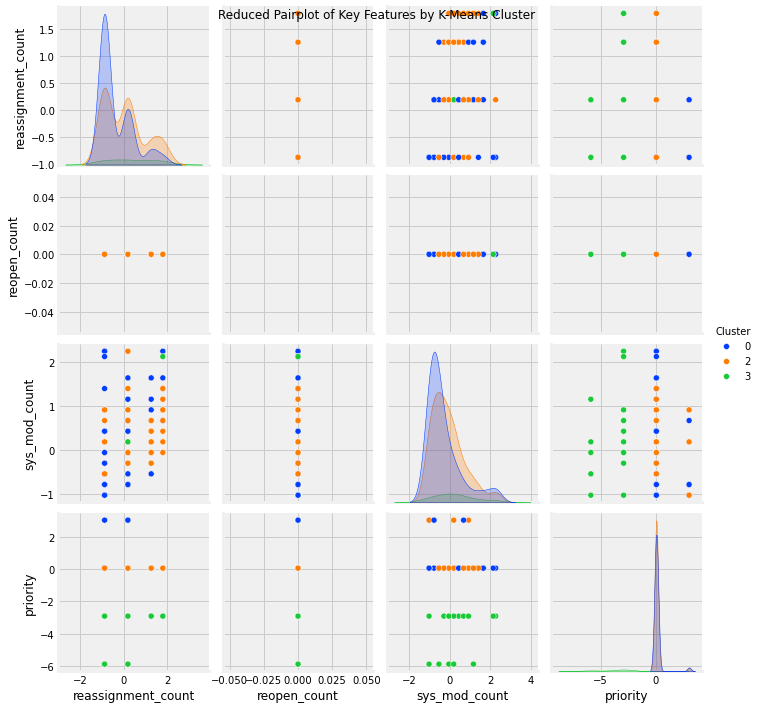

In [40]:
# Selecting a few key features for visualization to reduce computational load
key_features_for_pairplot = ['reassignment_count', 'reopen_count', 'sys_mod_count', 'priority', 'Cluster']

# Reducing the sample size further for pairplot
pairplot_sample_size = 300  # Smaller sample size for faster execution

# Sampling the data
X_train_clustered_sampled = X_train_clustered[key_features_for_pairplot].sample(n=pairplot_sample_size, random_state=42)

# Visualizing the pairplot with selected features and smaller sample
sns.pairplot(X_train_clustered_sampled, hue='Cluster', palette='bright')
plt.suptitle('Reduced Pairplot of Key Features by K-Means Cluster')
plt.show()

### Model 4: Hierarchical Clustering

In [41]:
# Apply Hierarchical Clustering
# Sample a subset of the data for clustering to reduce computational load
sample_size = 1000  # Adjust the sample size based on your computational capacity
X_train_sampled = X_train_scaled[:sample_size]

In [42]:
# Apply Hierarchical Clustering on the sampled data
hc_model = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
hc_labels_sampled = hc_model.fit_predict(X_train_sampled)

In [43]:
# Add hierarchical cluster labels to the sampled dataset
X_train_sampled_hclustered = X_train[:sample_size].copy()
X_train_sampled_hclustered['HCluster'] = hc_labels_sampled

In [44]:
# Analyzing hierarchical clusters on the sampled data
hclustered_group_sampled = X_train_sampled_hclustered.groupby('HCluster').mean()
print("\nMean values of features in each Hierarchical cluster (Sampled Data):\n", hclustered_group_sampled)


Mean values of features in each Hierarchical cluster (Sampled Data):
             number  incident_state  reassignment_count  reopen_count   
HCluster                                                               
0         0.235600        0.015774           -0.020376           0.0  \
1        -1.190700       -0.206121            0.097841           0.0   
2        -0.994868        0.322558           -0.341128           0.0   
3         1.773208       -0.400344            0.223977           0.0   

          sys_mod_count  made_sla  caller_id  opened_by  opened_at   
HCluster                                                             
0             -0.037447  0.924877  -0.038922  -0.045085   0.122402  \
1              0.049786  0.994083  -0.046437   0.425659  -0.911396   
2             -0.168154  1.000000  -0.279789  -0.045352  -0.796872   
3              0.459013  1.000000  -0.237857   0.361893   6.380785   

          sys_created_by  ...  problem_id       rfc    vendor  caused_by   

In [45]:
# Silhouette score for hierarchical clustering on the sampled data
silhouette_avg_hc_sampled = silhouette_score(X_train_sampled, hc_labels_sampled)
print(f'Silhouette Score for Hierarchical Clustering (Sampled Data): {silhouette_avg_hc_sampled:.2f}')

Silhouette Score for Hierarchical Clustering (Sampled Data): 0.14


### MODEL PERFORMANCE COMPARISON

In [46]:
# Logistic Regression Evaluation
log_reg = LogisticRegression(max_iter=100)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_report = classification_report(y_test, y_pred_log_reg)

# Printing Model Evaluation Reports
print("Logistic Regression:\nAccuracy: ", log_reg_accuracy)
print(log_reg_report)

Logistic Regression:
Accuracy:  0.9627208480565371
              precision    recall  f1-score   support

       False       0.92      0.86      0.89      5040
        True       0.97      0.98      0.98     23260

    accuracy                           0.96     28300
   macro avg       0.95      0.92      0.93     28300
weighted avg       0.96      0.96      0.96     28300



In [47]:
# Random Forest Evaluation
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

# Printing Model Evaluation Reports
print("\nRandom Forest:\nAccuracy: .2f", rf_accuracy)
print(rf_report)


Random Forest:
Accuracy: .2f 0.9997879858657244
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      5040
        True       1.00      1.00      1.00     23260

    accuracy                           1.00     28300
   macro avg       1.00      1.00      1.00     28300
weighted avg       1.00      1.00      1.00     28300



In [48]:
# Gradient Boosting Classifier Evaluation
# Reducing the number of estimators and depth to speed up training
gb_classifier = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=2, random_state=42)
gb_classifier.fit(X_train_scaled, y_train)
y_pred_gb = gb_classifier.predict(X_test_scaled)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_report = classification_report(y_test, y_pred_gb)

# Printing Model Evaluation Reports
print("\nGradient Boosting Classifier:\nAccuracy:", gb_accuracy)
print(gb_report)


Gradient Boosting Classifier:
Accuracy: 0.9996113074204948
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      5040
        True       1.00      1.00      1.00     23260

    accuracy                           1.00     28300
   macro avg       1.00      1.00      1.00     28300
weighted avg       1.00      1.00      1.00     28300



In [49]:
# K-Means Clustering Evaluation on a sample of the data
sample_size = 500  # Reduce sample size for faster execution
X_train_sampled = X_train_scaled[:sample_size]

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_train_sampled)
kmeans_silhouette = silhouette_score(X_train_sampled, kmeans.labels_)

# Printing Model Evaluation Reports
print("\nK-Means Clustering:\nSilhouette Score:", kmeans_silhouette)


K-Means Clustering:
Silhouette Score: 0.10205174100773266


In [50]:
# Agglomerative Clustering Evaluation on a sample of the data
hc = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X_train_sampled)  # Using the same sample as K-Means
hc_silhouette = silhouette_score(X_train_sampled, hc_labels)

# Printing Model Evaluation Reports
print("\nAgglomerative Clustering:\nSilhouette Score:", hc_silhouette)


Agglomerative Clustering:
Silhouette Score: 0.5054056386411614


### Conclusion and Understanding of Model Results

#### Model Performance Summary:

| Metrics / Models            | Logistic Regression | Random Forest      | Gradient Boosting  | K-Means Clustering | Agglomerative Clustering |
|-----------------------------|---------------------|--------------------|--------------------|--------------------|--------------------------|
| **Accuracy**                | 0.9627              | 0.9998             | 0.9996             | -                  | -                        |
| **Precision (True Class)**  | 0.97                | 1.00               | 1.00               | -                  | -                        |
| **Recall (True Class)**     | 0.98                | 1.00               | 1.00               | -                  | -                        |
| **F1-Score (True Class)**   | 0.98                | 1.00               | 1.00               | -                  | -                        |
| **Silhouette Score**        | -                   | -                  | -                  | 0.102              | 0.505                    |

#### Insights and Implications:

- **Logistic Regression** shows good performance but is outperformed by the other two classification models in terms of accuracy, precision, and recall.
- Both **Random Forest** and **Gradient Boosting Classifier** exhibit near-perfect scores, suggesting a possibility of overfitting. These models should be further investigated for potential biases.
- In clustering, **Agglomerative Clustering** has a higher silhouette score compared to **K-Means**, indicating better-defined clusters.
- It's important to evaluate models not only on accuracy but also on how they perform on precision, recall, and F1-score, especially in imbalanced datasets.
- The high performance of Random Forest and Gradient Boosting models warrants a deeper analysis, possibly using techniques such as cross-validation, to confirm these results are reliable and not due to overfitting or data leakage.
- Clustering models are evaluated differently, using silhouette scores. A higher silhouette score indicates better-defined clusters.


## TASK 3.1: Innovative Model

In [51]:
# Feature scaling => Program won't be crashed when exec
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
# Feature Engineering with lower degree
poly = PolynomialFeatures(degree=1, include_bias=False)
X_poly = poly.fit_transform(X)

In [53]:
# Define base models with simpler settings
models = {
    'Logistic Regression': LogisticRegression(max_iter=100),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=3, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, max_depth=2)
}

In [54]:
# Train and validate each model except SVM
for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f'{name} accuracy: {accuracy.round(3)}')
    
# SVM Model: Using a subset of the data to reduce computational time
svm_model = make_pipeline(StandardScaler(), SVC(probability=True, kernel='linear', cache_size=500))
svm_sample_size = int(0.2 * len(X_train))  # 20% of the training data
svm_X_train_sample = X_train[:svm_sample_size]
svm_y_train_sample = y_train[:svm_sample_size]

svm_model.fit(svm_X_train_sample, svm_y_train_sample)
svm_accuracy = svm_model.score(X_test, y_test)
print('SVM accuracy:', svm_accuracy.round(3))

Logistic Regression accuracy: 0.963
K-Nearest Neighbors accuracy: 0.937
Random Forest accuracy: 0.976
Gradient Boosting accuracy: 1.0
SVM accuracy: 0.964


In [55]:
# Blending predictions
predictions = np.column_stack([
    model.predict_proba(X_test)[:, 1] for model in models.values()
] + [svm_model.predict_proba(X_test)[:, 1]])

In [56]:
# Custom weights based on validation performance
weights = [0.25, 0.25, 0.25, 0.15, 0.1]  # Adjust based on model performance
blended_predictions = np.average(predictions, axis=1, weights=weights)

In [57]:
# Post-processing: Apply threshold
final_predictions = (blended_predictions > 0.5).astype(int)

In [58]:
# Evaluate the final ensemble model
print('Final Model Accuracy:', accuracy_score(y_test, final_predictions).round(3))
print(classification_report(y_test, final_predictions))

Final Model Accuracy: 0.982
              precision    recall  f1-score   support

       False       0.99      0.90      0.95      5040
        True       0.98      1.00      0.99     23260

    accuracy                           0.98     28300
   macro avg       0.99      0.95      0.97     28300
weighted avg       0.98      0.98      0.98     28300

